# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("whitegrid")


In [3]:
df = sns.load_dataset('penguins')

In [4]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

Solution:

         1. species (نوع البطريق):
            Reffers to the type of the penguin (categorical).
         2. island (الجزيرة):
            Reffers to the place that the penguin belongs to (categorical).
         3. bill_length_mm:
            How long (horizontally) is the beak of the penguin in millimetre? (numeric)
         4. bill_depth_mm:            
            How long (vertically) is the beak of the penguin in millimetre? (numeric)
         5. flipper_length_mm
            How long is the wing of the penguin in millimetre? (numeric)
         6. body_mass_g (الكتلة):
            Body mass of the penguin in grams.
         7. sex (الجنس):
            Reffers to the gender of the penguin (numeric).

Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
df.sample(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
67,Adelie,Biscoe,41.1,19.1,188.0,4100.0,Male
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN


In [7]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [10]:
df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [11]:
miss=dict(df.isnull().sum())
miss

{'species': 0,
 'island': 0,
 'bill_length_mm': 2,
 'bill_depth_mm': 2,
 'flipper_length_mm': 2,
 'body_mass_g': 2,
 'sex': 11}

In [12]:
df.isnull().sum().sum()

19

In [13]:
#percentage of missing values
(df.isnull().sum().sum()/len(df))*100

5.523255813953488

In [14]:
for key , value in miss.items():
  print('percentage of missing values in {} is {}\n'.format(key,(df[key].isnull().sum().sum()/len(df))*100))

percentage of missing values in species is 0.0

percentage of missing values in island is 0.0

percentage of missing values in bill_length_mm is 0.5813953488372093

percentage of missing values in bill_depth_mm is 0.5813953488372093

percentage of missing values in flipper_length_mm is 0.5813953488372093

percentage of missing values in body_mass_g is 0.5813953488372093

percentage of missing values in sex is 3.1976744186046515



In [15]:
#filling numeric values with their columns mean.
df['bill_length_mm']=df['bill_length_mm'].fillna(df['bill_length_mm'].mode()[0])
df['bill_depth_mm']=df['bill_depth_mm'].fillna(df['bill_depth_mm'].mode()[0])
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mode()[0])
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].mode()[0])

In [16]:
df.groupby('species')['sex'].agg(pd.Series.mode)
#df[['species','sex']].groupby(['species'])['sex'].agg(pd.Series.mode)

species
Adelie       [Female, Male]
Chinstrap    [Female, Male]
Gentoo                 Male
Name: sex, dtype: object

In [17]:
df.groupby('species')['sex'].value_counts()

species    sex   
Adelie     Female    73
           Male      73
Chinstrap  Female    34
           Male      34
Gentoo     Male      61
           Female    58
Name: count, dtype: int64

In [18]:
missing_vals = df['sex'].isna()
missing_vals

0      False
1      False
2      False
3       True
4      False
       ...  
339     True
340    False
341    False
342    False
343    False
Name: sex, Length: 344, dtype: bool

In [19]:
conditions = [df.loc[missing_vals,'sex'] & df.loc[missing_vals , 'species'] =='Gentoo',
df.loc[missing_vals,'sex'] & df.loc[missing_vals , 'species'] !='Gentoo']
conditions

[3      False
 8      False
 9      False
 10     False
 11     False
 47     False
 246    False
 286    False
 324    False
 336    False
 339    False
 dtype: bool,
 3      True
 8      True
 9      True
 10     True
 11     True
 47     True
 246    True
 286    True
 324    True
 336    True
 339    True
 dtype: bool]

In [20]:
choicelist = ['Male', 'Female']


In [21]:
df.loc[missing_vals, 'sex'] = np.select(conditions, choicelist)

In [22]:
#checking again for missing values:
df.isnull().sum().sum()

0

In [23]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [24]:
#Number of duplicates
df.duplicated().sum().sum()

0

In [25]:
#Calculate the percentage of data loss after cleaning
#there is no data loss as the drop method is not used in cleaning.

# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [27]:
mem_usage_before = df.memory_usage(deep=True)

In [28]:
# convert categotical types
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [29]:
# convert numerical types
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['bill_length_mm'] = df['bill_length_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')
df['body_mass_g'] = df['body_mass_g'].astype('float32')


Calculate memory saved after type conversion

In [30]:
mem_usage_after = df.memory_usage(deep=True)

In [31]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 66 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [32]:
for column in df.columns:
  if df[column].dtype=='category':
    print(df[column].value_counts())
    print()
    print(df[column].unique())
    print('---------------------------------------------------------------')
#no inconsistency in categorical values

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']
---------------------------------------------------------------
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']
---------------------------------------------------------------
sex
Female    176
Male      168
Name: count, dtype: int64

['Male', 'Female']
Categories (2, object): ['Female', 'Male']
---------------------------------------------------------------


# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [33]:
df_num = df.select_dtypes(include = ['category'])
df_cat = df.select_dtypes( include = ['float32'])


In [34]:
df_num.describe().T

,count,unique,top,freq
species,344,3,Adelie,152
island,344,3,Biscoe,168
sex,344,2,Female,176


In [35]:
df_cat.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,344.0,43.905521,5.447882,32.099998,39.275,44.250000,48.500000,59.599998
bill_depth_mm,344.0,17.150291,1.969061,13.100000,15.600,17.299999,18.700001,21.500000
flipper_length_mm,344.0,200.851746,14.045266,172.000000,190.000,197.000000,213.000000,231.000000
body_mass_g,344.0,4199.418457,800.197876,2700.000000,3550.000,4025.000000,4750.000000,6300.000000


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

<ipython-input-36-9f536fe3a927>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<function matplotlib.pyplot.show(close=None, block=None)>

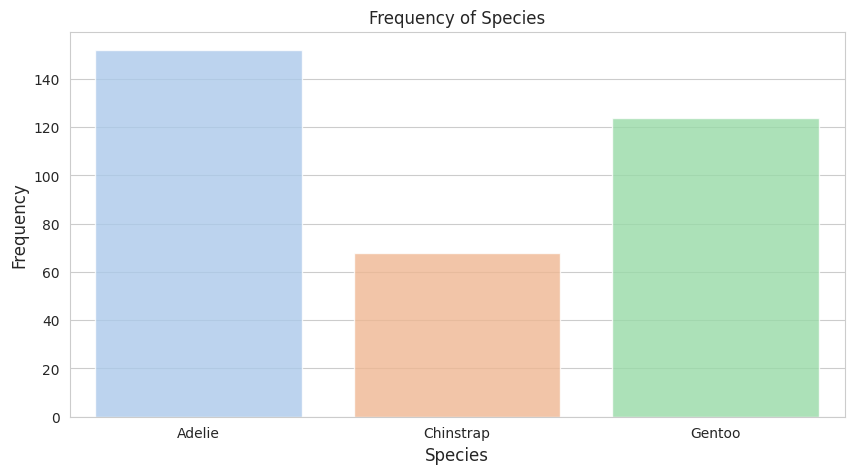

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(
    x = df['species'].value_counts().index,
    y= df['species'].value_counts().values,
    alpha = 0.8,
    palette = 'pastel'

)
plt.title('Frequency of Species', fontsize =12)
plt.xlabel('Species' , fontsize =12)
plt.ylabel('Frequency' , fontsize =12)
plt.show

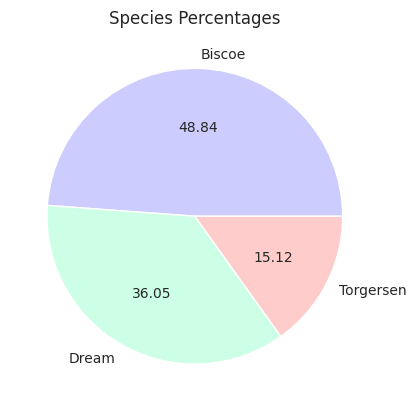

In [37]:
plt.pie(
    df['island'].value_counts().values ,
    labels = df['island'].value_counts().index,
    autopct='%.2f',
    colors = ['#CCCCFF','#CCFFE5','#FFCCCC']
)
plt.title('Species Percentages')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

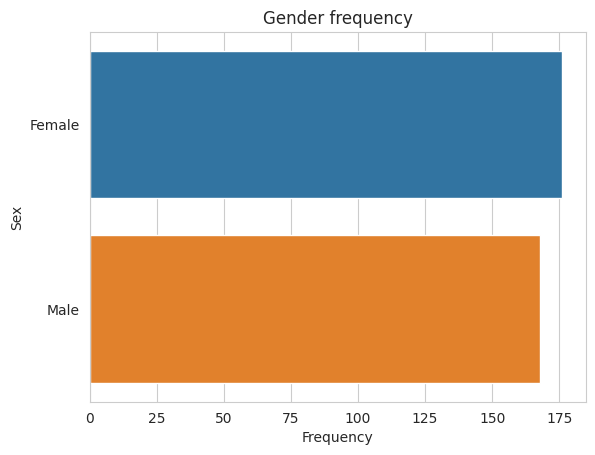

In [38]:


sns.barplot(
    y = df['sex'].value_counts().index ,
    x = df['sex'].value_counts().values ,
    orient = 'h',
    hue = df['sex'].value_counts().index

)
plt.title('Gender frequency',fontsize=12)
plt.xlabel('Frequency')
plt.ylabel('Sex')
plt.show

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

<function matplotlib.pyplot.show(close=None, block=None)>

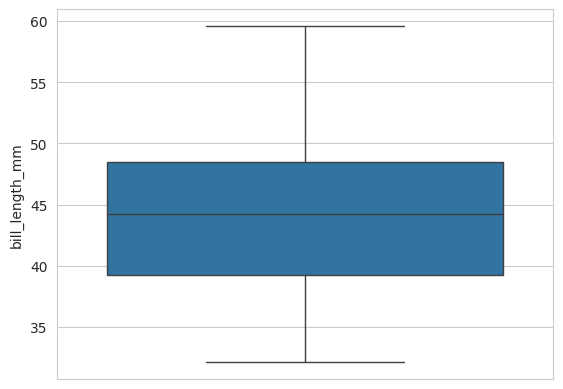

In [45]:
sns.boxplot(
    data = df,
    y = df['bill_length_mm'],
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

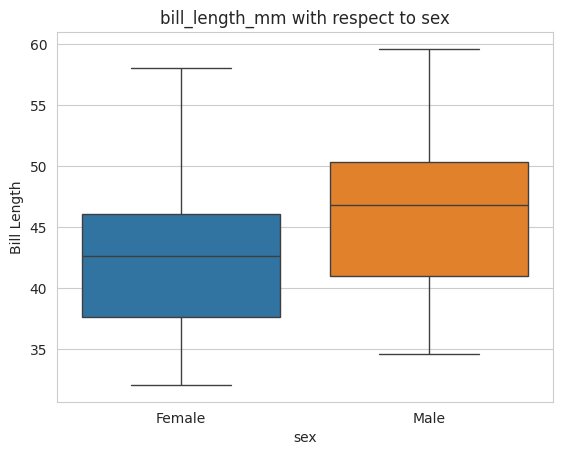

In [49]:
#boxplot of bill_length_mm with respect to sex
sns.boxplot(
    data = df,
    x = df['sex'],
    y = df['bill_length_mm'],
    hue = df['sex']
)
plt.title('bill_length_mm with respect to sex')
plt.xlabel('sex')
plt.ylabel('Bill Length')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

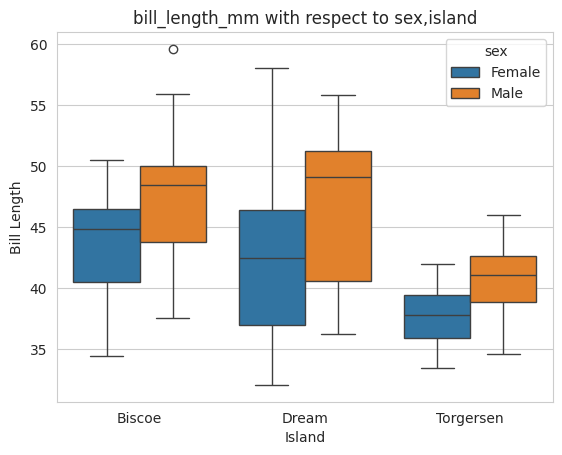

In [50]:
#boxplot of bill_length_mm with respect to sex,island
sns.boxplot(
    data = df,
    x = df['island'],
    y = df['bill_length_mm'],
    hue = df['sex']
)
plt.title('bill_length_mm with respect to sex,island')
plt.xlabel('Island')
plt.ylabel('Bill Length')
plt.show

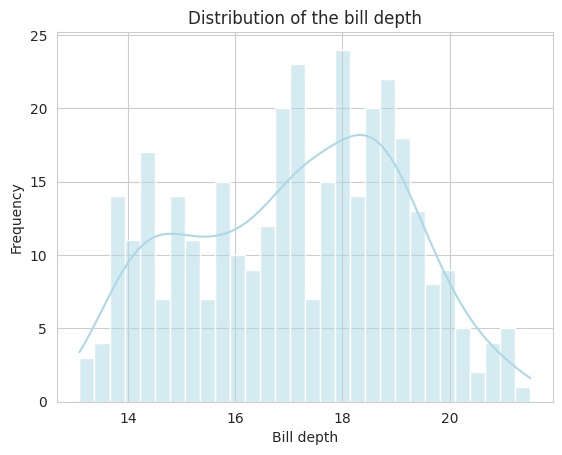

In [55]:
sns.histplot(
    data = df,
    x=df['bill_depth_mm'],
    color = 'lightblue',
    bins =30,
    kde=True
)
plt.title('Distribution of the bill depth', fontsize=12)
plt.xlabel('Bill depth')
plt.ylabel('Frequency')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

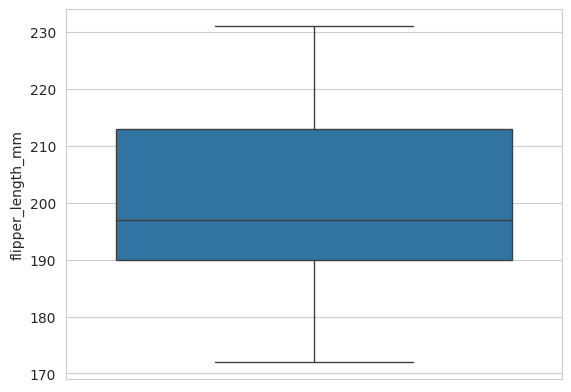

In [56]:
sns.boxplot(
    data = df,
    y = df['flipper_length_mm'],
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

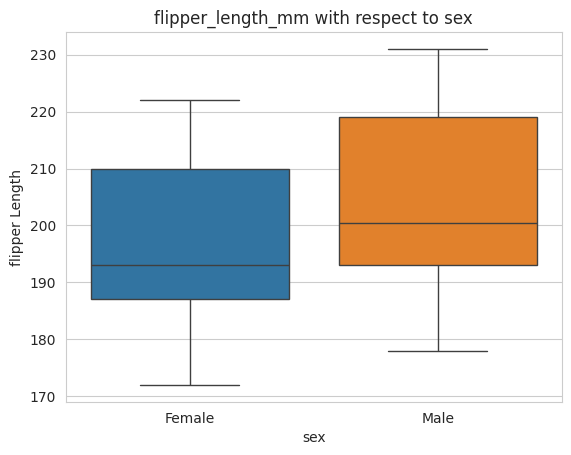

In [58]:
#boxplot of flipper_length_mm with respect to sex
sns.boxplot(
    data = df,
    x = df['sex'],
    y = df['flipper_length_mm'],
    hue = df['sex']
)
plt.title('flipper_length_mm with respect to sex')
plt.xlabel('sex')
plt.ylabel('flipper Length')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

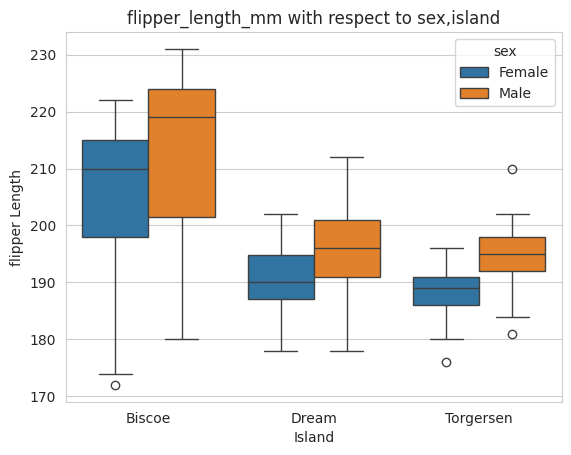

In [59]:
#boxplot of flipper_length_mm with respect to sex,island
sns.boxplot(
    data = df,
    x = df['island'],
    y = df['flipper_length_mm'],
    hue = df['sex']
)
plt.title('flipper_length_mm with respect to sex,island')
plt.xlabel('Island')
plt.ylabel('flipper Length')
plt.show

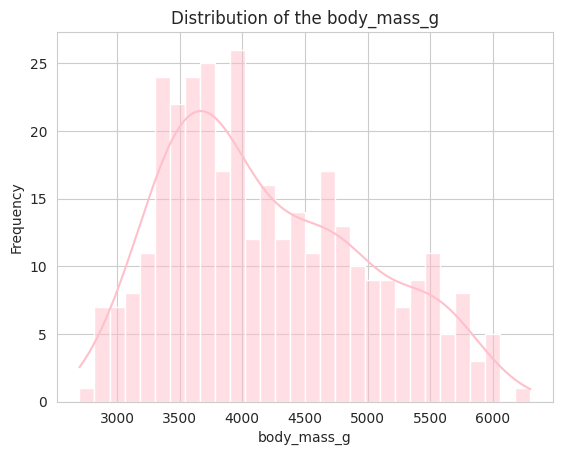

In [114]:
sns.histplot(
    data = df,
    x=df['body_mass_g'],
    color = 'pink',
    bins =30,
    kde=True
)
plt.title('Distribution of the body_mass_g', fontsize=12)
plt.xlabel('body_mass_g')
plt.ylabel('Frequency')
plt.show()

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

<Axes: >

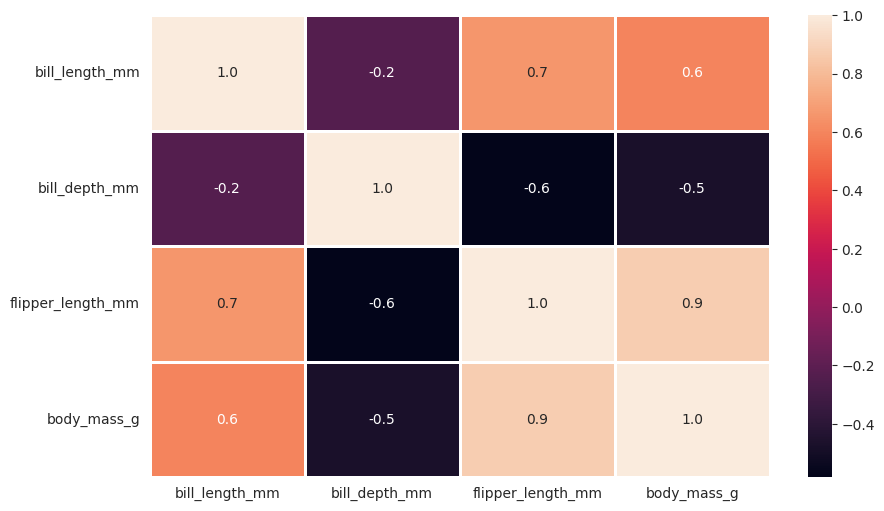

In [69]:
plt.figure(figsize = (10,6))
sns.heatmap(
    df.corr(numeric_only=True),
    fmt='.1f',
    annot = True,
    linewidth=1
)

In [63]:
df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.234635,0.656856,0.595720
bill_depth_mm,-0.234635,1.000000,-0.582472,-0.471339
flipper_length_mm,0.656856,-0.582472,1.000000,0.871302
body_mass_g,0.595720,-0.471339,0.871302,1.000000


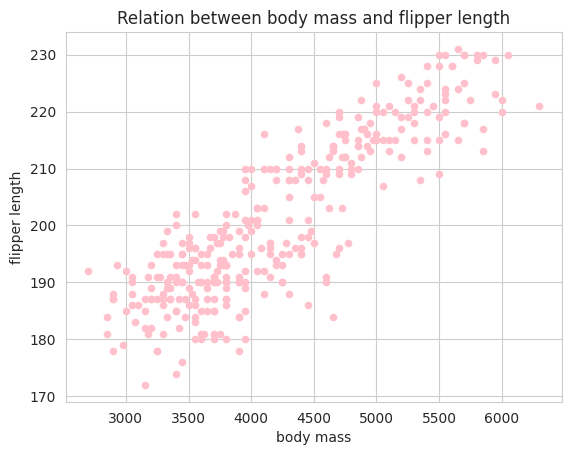

In [92]:


   df.plot.scatter(
       x = 'body_mass_g',
       y='flipper_length_mm',
       color='pink'
   )
   plt.title('Relation between body mass and flipper length' , fontsize =12)
   plt.xlabel('body mass')
   plt.ylabel('flipper length')
   plt.show()

Write down your observations based on the correlation heatmap.

Observations:



*   There is a strong positive correlation between flipper length and body mass.
*   There is also a slightly correlation between body mass and bill length.
* A correlation between flipper and bill length also exist, reaching to 0.7.



### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [195]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female
3,Adelie,Torgersen,41.099998,17.000000,190.0,3800.0,Female
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female


In [108]:
from sklearn.preprocessing import OneHotEncoder
df['bill_size'] = df['bill_length_mm'] * df['bill_depth_mm']
df['bill_ratio'] = df['bill_length_mm']/df['bill_depth_mm']
df['Mass_kg'] = df['body_mass_g']/0.001
encoder = OneHotEncoder(sparse_output=False)
gender = df[['sex']].columns.tolist()
one_hot = encoder.fit_transform(df[gender])
one_hot_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(gender))
df_encode = pd.concat([df, one_hot_df], axis=1)

In [111]:
df_encode.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_size,bill_ratio,Mass_kg,sex_Female,sex_Male
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male,731.169983,2.090909,3749999.75,0.0,1.0
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female,687.299988,2.270115,3799999.75,1.0,0.0
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female,725.399963,2.238889,3249999.75,1.0,0.0
3,Adelie,Torgersen,41.099998,17.000000,190.0,3800.0,Female,698.699951,2.417647,3799999.75,1.0,0.0
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female,708.309998,1.901554,3449999.75,1.0,0.0


Let's look at the correlation to see whether the newly created features are better.

<Axes: >

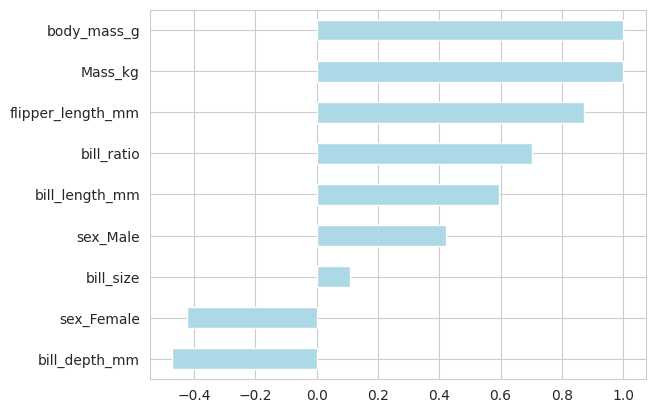

In [113]:
# This plots the correlation values for a specific column
# which is usually what we are interested in
corr= df_encode.corr(numeric_only=True)
corr['body_mass_g'].sort_values().plot.barh(color='lightblue')